# EDA of the ASAP-Review Dataset

In [83]:
from google.colab import drive
# Retry mounting Google Drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully!")
except ValueError as e:
    print(f"Mount failed: {e}. Please try re-running this cell.")

Mounted at /content/drive
Google Drive mounted successfully!


In [84]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

# Configure styles
sns.set(style='whitegrid', font_scale=1.2)

# Base dataset directory (adjust if needed)
DATASET_DIR = '/content/drive/MyDrive/1 METU/7/IS 584 – Deep Learning for Text Analytics/project/dataset'


In [3]:
!pip install tqdm

%matplotlib inline
sns.set(style='whitegrid', font_scale=1.2)


wHICH FOLDERS ARE THERE

### Exploring Conference Subdirectories

Next we want to confirm the structure under each conference folder (e.g. `ICLR_2017_paper`, `ICLR_2017_review`, etc.). Rather than hard-coding each year, we can:

1. Dynamically collect all top-level folders starting with `ICLR_` or `NIPS_`.  
2. Loop through them and list their immediate children.  
3. Print the results in a readable way.  

This approach scales automatically if we add more conferences in the future.


In [4]:
for entry in os.listdir(DATASET_DIR):
    print("-", entry)

- README.md
- aspect_data
- ICLR_2017
- ICLR_2018
- ICLR_2019
- ICLR_2020
- NIPS_2016
- NIPS_2017
- NIPS_2018
- NIPS_2019


In [5]:
conf = 'ICLR_2017'
conf_path = os.path.join(DATASET_DIR, conf)
print("Inside", conf, ":", os.listdir(conf_path))

conf = 'ICLR_2018'
conf_path = os.path.join(DATASET_DIR, conf)
print("Inside", conf, ":", os.listdir(conf_path))

conf = 'NIPS_2016'
conf_path = os.path.join(DATASET_DIR, conf)
print("Inside", conf, ":", os.listdir(conf_path))

conf = 'NIPS_2017'
conf_path = os.path.join(DATASET_DIR, conf)
print("Inside", conf, ":", os.listdir(conf_path))


Inside ICLR_2017 : ['ICLR_2017_content', 'ICLR_2017_paper', 'ICLR_2017_review']
Inside ICLR_2018 : ['ICLR_2018_content', 'ICLR_2018_paper', 'ICLR_2018_review']
Inside NIPS_2016 : ['NIPS_2016_content', 'NIPS_2016_paper', 'NIPS_2016_review']
Inside NIPS_2017 : ['NIPS_2017_content', 'NIPS_2017_paper', 'NIPS_2017_review']


In [6]:
all_entries = os.listdir(DATASET_DIR)
confs = [d for d in all_entries if d.startswith(('ICLR_', 'NIPS_'))]

for conf in sorted(confs):
    conf_path = os.path.join(DATASET_DIR, conf)
    # List only subdirectories (paper, review, content)
    subdirs = [name for name in os.listdir(conf_path)
               if os.path.isdir(os.path.join(conf_path, name))]
    print(f"Inside {conf}: {subdirs}")

Inside ICLR_2017: ['ICLR_2017_content', 'ICLR_2017_paper', 'ICLR_2017_review']
Inside ICLR_2018: ['ICLR_2018_content', 'ICLR_2018_paper', 'ICLR_2018_review']
Inside ICLR_2019: ['ICLR_2019_content', 'ICLR_2019_paper', 'ICLR_2019_review']
Inside ICLR_2020: ['ICLR_2020_content', 'ICLR_2020_paper', 'ICLR_2020_review']
Inside NIPS_2016: ['NIPS_2016_content', 'NIPS_2016_paper', 'NIPS_2016_review']
Inside NIPS_2017: ['NIPS_2017_content', 'NIPS_2017_paper', 'NIPS_2017_review']
Inside NIPS_2018: ['NIPS_2018_content', 'NIPS_2018_paper', 'NIPS_2018_review']
Inside NIPS_2019: ['NIPS_2019_content', 'NIPS_2019_paper', 'NIPS_2019_review']


### 2. Inspect One Conference in Detail

Now that we see each `conf` has the expected `_paper` and `_review` subfolders, pick one (e.g. `ICLR_2017`) and drill down into the paper directory. We'll list a few filenames and examine a single JSON to understand its keys.


In [7]:
# Choose one conference to inspect
conf = 'ICLR_2017'
conf_path = os.path.join(DATASET_DIR, conf)

# Show its subfolders to verify
print(f"Inside {conf}: {os.listdir(conf_path)}")

Inside ICLR_2017: ['ICLR_2017_content', 'ICLR_2017_paper', 'ICLR_2017_review']


In [8]:
# Path to its paper folder
paper_dir = os.path.join(conf_path, f"{conf}_paper")
files = os.listdir(paper_dir)

# Print the total count and a few example filenames
print(f"Found {len(files)} files; e.g.:", files[:5])

# Pick the first file and load it to inspect its structure
fn = files[0]
print("Sample filename:", fn)

Found 489 files; e.g.: ['ICLR_2017_395_paper.json', 'ICLR_2017_281_paper.json', 'ICLR_2017_142_paper.json', 'ICLR_2017_31_paper.json', 'ICLR_2017_175_paper.json']
Sample filename: ICLR_2017_395_paper.json


In [9]:
# Load the JSON metadata for one paper
sample = json.load(open(os.path.join(paper_dir, fn), 'r', encoding='utf-8'))

# Display the top‐level keys and a few fields
print("Keys in JSON:", sample.keys())
print("  id     :", sample['id'])
print("  title  :", sample['title'][:80], "…")
print("  authors:", sample['authors'])

Keys in JSON: dict_keys(['id', 'conference', 'decision', 'url', 'hasContent', 'hasReview', 'title', 'authors'])
  id     : ICLR_2017_395
  title  : RL^2: Fast Reinforcement Learning via Slow Reinforcement Learning …
  authors: ['Yan Duan', 'John Schulman', 'Xi Chen', 'Peter L. Bartlett', 'Ilya Sutskever', 'Pieter Abbeel']


Each paper JSON contains id, conference, decision, hasReview, hasContent, title, authors. confirming what metadata we'll later load into our DataFrame.

#### `load_one_conference_papers(conf)`

This function reads **all paper metadata JSONs** for a given conference folder:
1. Constructs the path,  
2. Iterates over every file ending in `_paper.json`.  
3. Parses each JSON into a Python dict and appends it to a list.  
4. Returns the full list of paper dicts for downstream analysis.

In [10]:
def load_one_conference_papers(conf):
    papers = []  # will hold all paper metadata dicts
    # Path to the paper folder for this conference
    paper_dir = os.path.join(DATASET_DIR, conf, f"{conf}_paper")

    # Loop through every file in that folder
    for fn in os.listdir(paper_dir):
        # Only process metadata JSONs
        if fn.endswith('_paper.json'):
            path = os.path.join(paper_dir, fn)
            # Load the JSON into a dict
            with open(path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            papers.append(data)

    return papers

# Test: load papers for ICLR_2017
papers = load_one_conference_papers('ICLR_2017')
print("Loaded paper count:", len(papers))

Loaded paper count: 489


#### `load_one_conference_reviews(conf)`

This function reads **all review‐object JSONs** for a given conference:
1. Targets the `<conf>_review/` folder.  
2. Selects files ending in `_review.json`.  
3. Parses and collects each review object (which contains the list of individual reviews and metaReview).

In [11]:
def load_one_conference_reviews(conf):
    reviews = []  # will gather all raw review‐object dicts
    review_dir = os.path.join(DATASET_DIR, conf, f"{conf}_review")

    for fn in os.listdir(review_dir):
        # Only JSON files representing review objects
        if fn.endswith('_review.json'):
            path = os.path.join(review_dir, fn)
            with open(path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            reviews.append(data)

    return reviews

# Quick test: load reviews for ICLR_2017
reviews = load_one_conference_reviews('ICLR_2017')
print("Loaded review‐objects count:", len(reviews))

Loaded review‐objects count: 490


#### `load_all()`

This function loops through every conference folder (`ICLR_*` and `NIPS_*`):
1. Calls `load_one_conference_papers` and `load_one_conference_reviews` for each.  
2. Concatanates and extends two master lists: `all_papers` and `all_reviews`.  
3. Converts `all_papers` into a `pandas.DataFrame` for easy EDA.  
4. Returns `(papers_df, all_reviews)`.
5. We’re loading two different kinds of objects:

a. Paper metadata → goes into all_papers.:

b. Review objects → goes into all_reviews.

In [12]:
def load_all():
    all_papers, all_reviews = [], []

    # Automatically detect conference folders
    for d in os.listdir(DATASET_DIR):
        if d.startswith(('ICLR_', 'NIPS_')):
            # Load papers and reviews for this conference
            ps = load_one_conference_papers(d)
            rs = load_one_conference_reviews(d)
            all_papers.extend(ps)
            all_reviews.extend(rs)

    # Convert paper list into a DataFrame
    papers_df = pd.DataFrame(all_papers)
    return papers_df, all_reviews

# Execute and verify totals
papers_df, reviews_raw = load_all()
print(f"Total papers: {len(papers_df)}, total review-objects: {len(reviews_raw)}")

Total papers: 8877, total review-objects: 8780


In [13]:
# Checks
print(papers_df.head(2).T)        # first 2 papers, Transposed for readability
# reviews_raw is a list of dicts; each dict should have keys 'id' and 'reviews'
print("Review object example keys:", reviews_raw[0].keys())

                                                            0  \
id                                              ICLR_2017_395   
conference                                               ICLR   
decision                                               Reject   
url         http://openreview.net/pdf/c1cfee5be26dee2679a1...   
hasContent                                               true   
hasReview                                                true   
title       RL^2: Fast Reinforcement Learning via Slow Rei...   
authors     [Yan Duan, John Schulman, Xi Chen, Peter L. Ba...   

                                                            1  
id                                              ICLR_2017_281  
conference                                               ICLR  
decision                                               Reject  
url         http://openreview.net/pdf/2f13fb612ef82e430be7...  
hasContent                                               true  
hasReview                     

In [14]:
# Confirm data types of our two main variables
print("\nType checks:")
print("  papers_df is a", type(papers_df))
print("  reviews_raw is a", type(reviews_raw))

# Confirm the full range
print(f"\nTotal papers: {len(papers_df)}, showing bottom 2 rows:")
print(papers_df.tail(2))


Type checks:
  papers_df is a <class 'pandas.core.frame.DataFrame'>
  reviews_raw is a <class 'list'>

Total papers: 8877, showing bottom 2 rows:
                  id conference decision  \
8875  NIPS_2019_1065       NIPS   Accept   
8876  NIPS_2019_1218       NIPS   Accept   

                                                    url hasContent hasReview  \
8875  http://papers.nips.cc/paper/9359-adaptive-temp...       true      true   
8876  http://papers.nips.cc/paper/9512-communication...       true      true   

                                                  title  \
8875  Adaptive Temporal-Difference Learning for Poli...   
8876  Communication trade-offs for Local-SGD with la...   

                                                authors  
8875  [Carlos Riquelme, Hugo Penedones, Damien Vince...  
8876          [Aymeric Dieuleveut, Kumar Kshitij Patel]  


In [15]:
type(reviews_raw)
papers_df

,id,conference,decision,url,hasContent,hasReview,title,authors
0,ICLR_2017_395,ICLR,Reject,http://openreview.net/pdf/c1cfee5be26dee2679a1...,true,true,RL^2: Fast Reinforcement Learning via Slow Rei...,"[Yan Duan, John Schulman, Xi Chen, Peter L. Ba..."
1,ICLR_2017_281,ICLR,Reject,http://openreview.net/pdf/2f13fb612ef82e430be7...,true,true,A Joint Many-Task Model: Growing a Neural Netw...,"[Kazuma Hashimoto, Caiming Xiong, Yoshimasa Ts..."
2,ICLR_2017_142,ICLR,Accept (Poster),http://openreview.net/pdf/1b6c5951af988d823360...,true,true,Automatic Rule Extraction from Long Short Term...,"[W. James Murdoch, Arthur Szlam]"
3,ICLR_2017_31,ICLR,Accept (Poster),http://openreview.net/pdf/8463d5bb4a13ac71ddfd...,true,true,Transfer of View-manifold Learning to Similari...,"[Xingyu Lin, Hao Wang, Zhihao Li, Yimeng Zhang..."
4,ICLR_2017_175,ICLR,Accept (Poster),http://openreview.net/pdf/908e82ec04bafe607a8b...,true,true,Learning Invariant Representations Of Planar C...,"[Gautam Pai, Aaron Wetzler, Ron Kimmel]"
...,...,...,...,...,...,...,...,...
8872,NIPS_2019_767,NIPS,Accept,http://papers.nips.cc/paper/9061-large-memory-...,true,true,Large Memory Layers with Product Keys,"[Guillaume Lample, Alexandre Sablayrolles, Mar..."
8873,NIPS_2019_994,NIPS,Accept,http://papers.nips.cc/paper/9288-local-sgd-wit...,true,false,Local SGD with Periodic Averaging: Tighter An...,"[Farzin Haddadpour, Mohammad Mahdi Kamani, Meh..."
8874,NIPS_2019_750,NIPS,Accept,http://papers.nips.cc/paper/9044-provably-glob...,true,true,Provably Global Convergence of Actor-Critic: A...,"[Zhuoran Yang, Yongxin Chen, Mingyi Hong, Zhao..."
8875,NIPS_2019_1065,NIPS,Accept,http://papers.nips.cc/paper/9359-adaptive-temp...,true,true,Adaptive Temporal-Difference Learning for Poli...,"[Carlos Riquelme, Hugo Penedones, Damien Vince..."


### While it was possible to use review_raw for the analysis, thinking that creating a dataframe would be useful for future us, I wanted to create a dataframe from the raw set, and for its creation I asked chatgpt a lot.

In [16]:
# 1) Define extract_review_data() in-line
import re
from tqdm import tqdm

def extract_review_data(raw_reviews):
    """
    Flatten the list of review‐object dicts (reviews_raw)
    into a pandas DataFrame of individual reviews.
    """
    records = []
    for obj in tqdm(raw_reviews, desc="Extracting reviews"):
        pid = obj.get('id', '')
        # Regular reviews (each reviewer’s comment)
        for i, rev in enumerate(obj.get('reviews', [])):
            text = rev.get('review', '').strip()
            # Extract numeric rating & confidence via regex
            rating_match     = re.search(r'(\d+)', rev.get('rating', ''))
            confidence_match = re.search(r'(\d+)', rev.get('confidence', ''))
            records.append({
                'paper_id': pid,
                'review_type': 'regular',
                'review_idx': i,
                'review_text': text,
                'numeric_rating': int(rating_match.group(1)) if rating_match else None,
                'numeric_confidence': int(confidence_match.group(1)) if confidence_match else None,
                'review_length': len(text.split())
            })
        # Meta‐review (area‐chair summary)
        if obj.get('metaReview'):
            mr = obj['metaReview'].strip()
            records.append({
                'paper_id': pid,
                'review_type': 'meta',
                'review_idx': -1,
                'review_text': mr,
                'numeric_rating': None,
                'numeric_confidence': None,
                'review_length': len(mr.split())
            })
    # Convert to DataFrame
    import pandas as pd
    return pd.DataFrame(records)

# 2) Create reviews_df from the reviews_raw list
reviews_df = extract_review_data(reviews_raw)

# Quick sanity check
print("Number of raw review-objects:", len(reviews_raw))
print("Flattened reviews_df shape    :", reviews_df.shape)
reviews_df.head(3)

Extracting reviews: 100%|██████████| 8780/8780 [00:00<00:00, 12975.62it/s]


Number of raw review-objects: 8780
Flattened reviews_df shape    : (34046, 7)


,paper_id,review_type,review_idx,review_text,numeric_rating,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,7.0,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5.0,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4.0,4.0,138


### Here we see the papers_df has 8 columns (id, conference, decision, url, hasContent, hasReview, title, authors).

Reviews per paper summary:
count    8780.000000
mean        3.202961
std         0.738378
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         8.000000
dtype: float64


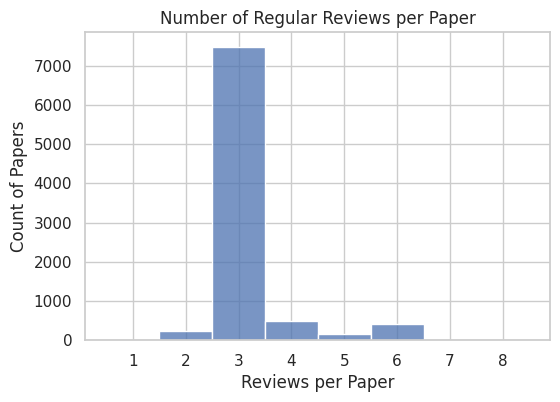

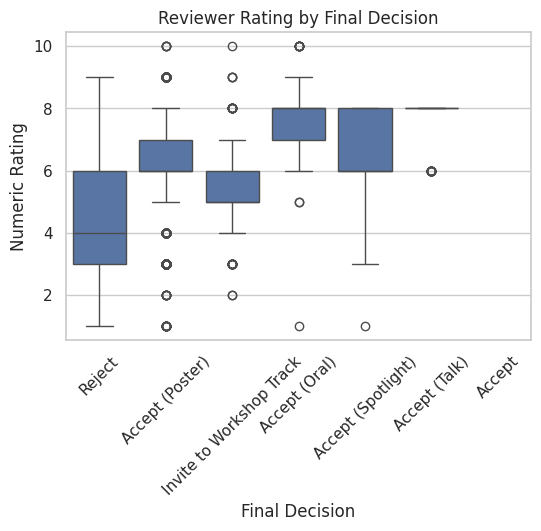

<Figure size 600x400 with 0 Axes>

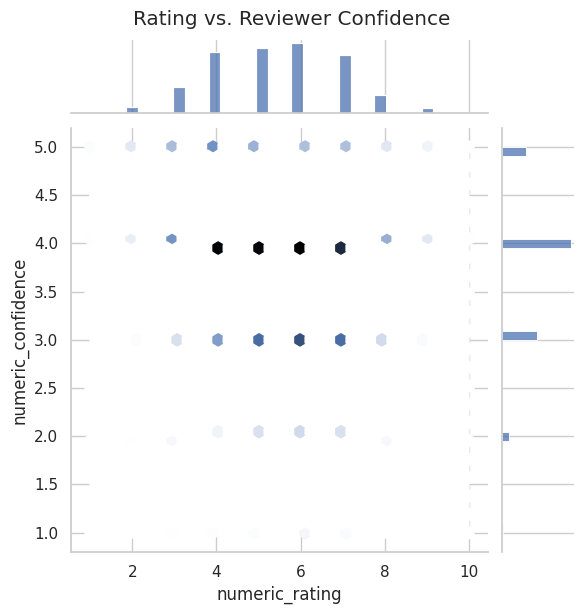

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style='whitegrid')

# 1) Reviews-per-paper distribution
# Only count “regular” reviews
rpp = reviews_df[reviews_df['review_type']=='regular'] \
         .groupby('paper_id').size()

print("Reviews per paper summary:")
print(rpp.describe())

plt.figure(figsize=(6,4))
sns.histplot(rpp, bins=range(1, rpp.max()+2), discrete=True)
plt.title("Number of Regular Reviews per Paper")
plt.xlabel("Reviews per Paper")
plt.ylabel("Count of Papers")
plt.show()


# 2) Rating vs. Final Decision
# Merge regular reviews with the paper decision
merged = (reviews_df[reviews_df['review_type']=='regular']
           .merge(papers_df[['id','decision']],
                  left_on='paper_id', right_on='id',
                  how='left'))

plt.figure(figsize=(6,4))
sns.boxplot(x='decision', y='numeric_rating', data=merged)
plt.xticks(rotation=45)
plt.title("Reviewer Rating by Final Decision")
plt.xlabel("Final Decision")
plt.ylabel("Numeric Rating")
plt.show()


# 3) Confidence vs. Rating
plt.figure(figsize=(6,4))
sns.jointplot(
    data=merged, x='numeric_rating', y='numeric_confidence',
    kind='hex', height=6
)
plt.suptitle("Rating vs. Reviewer Confidence", y=1.02)
plt.show()

# START FROM HERE FOR FUTURE TRIALS

In [18]:
def load_conference_data(conf):
    papers, reviews = [], []
    base = os.path.join(DATASET_DIR, conf)
    # papers
    for fn in os.listdir(os.path.join(base, conf + '_paper')):
        if fn.endswith('_paper.json'):
            papers.append(json.load(open(os.path.join(base, conf + '_paper', fn), 'r')))
    # reviews
    for fn in os.listdir(os.path.join(base, conf + '_review')):
        if fn.endswith('_review.json'):
            reviews.append(json.load(open(os.path.join(base, conf + '_review', fn), 'r')))
    return papers, reviews

def load_all():
    all_p, all_r = [], []
    for d in os.listdir(DATASET_DIR):
        if d.startswith(('ICLR_','NIPS_')):
            p, r = load_conference_data(d)
            all_p += p; all_r += r
    return pd.DataFrame(all_p), all_r

papers_df, reviews_raw = load_all()
print(f"Loaded {len(papers_df)} papers and {len(reviews_raw)} review-objects")

Loaded 8877 papers and 8780 review-objects


In [19]:
print(">>> papers_df shape:", papers_df.shape)
print("\nFirst 3 rows of papers_df:")
display(papers_df.head(3))

>>> papers_df shape: (8877, 8)

First 3 rows of papers_df:


,id,conference,decision,url,hasContent,hasReview,title,authors
0,ICLR_2017_395,ICLR,Reject,http://openreview.net/pdf/c1cfee5be26dee2679a1...,true,true,RL^2: Fast Reinforcement Learning via Slow Rei...,"[Yan Duan, John Schulman, Xi Chen, Peter L. Ba..."
1,ICLR_2017_281,ICLR,Reject,http://openreview.net/pdf/2f13fb612ef82e430be7...,true,true,A Joint Many-Task Model: Growing a Neural Netw...,"[Kazuma Hashimoto, Caiming Xiong, Yoshimasa Ts..."
2,ICLR_2017_142,ICLR,Accept (Poster),http://openreview.net/pdf/1b6c5951af988d823360...,true,true,Automatic Rule Extraction from Long Short Term...,"[W. James Murdoch, Arthur Szlam]"


In [20]:
print(f"\n>>> reviews_raw is a list of {len(reviews_raw)} review‐objects\n")
for i, rev_obj in enumerate(reviews_raw[:3]):
    print(f"reviews_raw[{i}] keys:", list(rev_obj.keys()))
    num_regs = len(rev_obj.get('reviews', []))
    print(f"  → Contains {num_regs} regular reviews")
    if num_regs > 0:
        # show first review’s rating/confidence
        first = rev_obj['reviews'][0]
        print("    sample rating :", first.get('rating'))
        print("    sample confidence:", first.get('confidence'))
    # show a snippet of the metaReview if it exists
    if 'metaReview' in rev_obj:
        snippet = rev_obj['metaReview'][:80].replace('\n',' ')
        print("    metaReview snippet:", snippet, "…")
    print()


>>> reviews_raw is a list of 8780 review‐objects

reviews_raw[0] keys: ['id', 'reviews']
  → Contains 3 regular reviews
    sample rating : 7: Good paper, accept
    sample confidence: 3: The reviewer is fairly confident that the evaluation is correct

reviews_raw[1] keys: ['id', 'reviews']
  → Contains 3 regular reviews
    sample rating : 7: Good paper, accept
    sample confidence: 4: The reviewer is confident but not absolutely certain that the evaluation is correct

reviews_raw[2] keys: ['id', 'reviews']
  → Contains 3 regular reviews
    sample rating : 7: Good paper, accept
    sample confidence: 5: The reviewer is absolutely certain that the evaluation is correct and very familiar with the relevant literature



- **`load_conference_data`**  
  Here a conference string (e.g. `"ICLR_2017"`), returns two Python lists:
  1. **`papers`** – a list of dicts, one per `*_paper.json` file.  
  2. **`reviews`** – a list of dicts, one per `*_review.json` file.

- **`load_all`**  
  A Python function  that:
  1. Scans `DATASET_DIR` for every `ICLR_*` and `NIPS_*` folder.  
  2. Calls `load_conference_data` for each, concatenating the results.  
  3. Returns two objects (in this order):
     - **`papers_df`** – a `pandas.DataFrame` built from all paper metadata dicts.  
     - **`reviews_raw`** – a flat Python list of all review-object dicts.

- **`papers_df`**  
  A DataFrame with one row per paper, containing columns such as: id, conference, decision, url, hasContent, hasReview, title, author

# 4. Expand Reviews into a DataFrame

In [21]:
obj = reviews_raw[0]
print(obj.keys())

dict_keys(['id', 'reviews'])


In [22]:
rev_list = obj.get('reviews', [])
print(f"Number of regular reviews in this paper: {len(rev_list)}")
print("Example review entry:", rev_list[0])

Number of regular reviews in this paper: 3
Example review entry: {'review': 'The paper is about channel sparsity in Convolution layer.\nThe paper is well written and it elaborately discussed and investigated different approaches for applying sparsity.  The paper contains detailed literature review.\nIn result section, it showed the approach gives good results using 60% sparsity with reducing number of parameters, which can be useful in some embedded application with limited resource i.e. mobile devices.\nThe main point is that the paper needs more detailed investigation on different dropout schedule.\nAs mentioned implementation details section, they deactivate the connections by applying masks to parameter tensors, which is not helpful in speeding up the training and computation in convolution layer. They can optimize implementation to reduce computation time.\n', 'rating': '7: Good paper, accept', 'confidence': '3: The reviewer is fairly confident that the evaluation is correct'}


Each entry in `rev_list` is itself a dict with keys:
- `review`     → the full review text  
- `rating`     → e.g. "7: Good paper, accept"  
- `confidence` → e.g. "3: The reviewer is fairly confident..."

In [23]:
sample = rev_list[0]
print("Text      :", sample['review'][:80], "…")
print("Rating str:", sample['rating'])
print("Conf str  :", sample['confidence'])

Text      : The paper is about channel sparsity in Convolution layer.
The paper is well writ …
Rating str: 7: Good paper, accept
Conf str  : 3: The reviewer is fairly confident that the evaluation is correct


The `rating` and `confidence` fields include both a numeric level and descriptive text.  
We only need the numeric portion, so we’ll extract digits via regex.

In [24]:
match_rating = re.search(r'(\d+)', sample['rating'])
match_conf   = re.search(r'(\d+)', sample['confidence'])
print("Numeric rating   →", match_rating.group(1))
print("Numeric confidence→", match_conf.group(1))

Numeric rating   → 7
Numeric confidence→ 3


In [25]:
rows = []
for obj in reviews_raw[:5]:                 # test on first 5 papers
    pid = obj['id']
    for i, rev in enumerate(obj.get('reviews', [])):
        text = rev.get('review','')
        # parse numeric rating / confidence
        m_r = re.search(r'(\d+)', rev.get('rating',''))
        m_c = re.search(r'(\d+)', rev.get('confidence',''))
        rows.append({
            'paper_id': pid,
            'type': 'regular',
            'review_idx': i,
            'text': text,
            'rating': int(m_r.group(1)) if m_r else None,
            'confidence': int(m_c.group(1)) if m_c else None,
            'length': len(text.split())
        })

import pandas as pd
test_df = pd.DataFrame(rows)
print(test_df.head())

        paper_id     type  review_idx  \
0  ICLR_2017_335  regular           0   
1  ICLR_2017_335  regular           1   
2  ICLR_2017_335  regular           2   
3  ICLR_2017_257  regular           0   
4  ICLR_2017_257  regular           1   

                                                text  rating  confidence  \
0  The paper is about channel sparsity in Convolu...       7           3   
1  This paper aims to improve efficiency of convo...       5           4   
2  The paper experiments with channel to channel ...       4           4   
3  This paper investigates the impact of orthogon...       7           4   
4  The paper is well-motivated, and is part of a ...       5           4   

   length  
0     115  
1     265  
2     138  
3     573  
4     331  


In [26]:
# Extended with gpt
# 1) Prepare an empty list to collect each review record
rows = []

# 2) Iterate over the first 5 review‐objects as a test
for obj in reviews_raw:
    paper_id = obj['id']  # paper identifier

    # 3) Loop through each regular review in this object
    for idx, rev in enumerate(obj.get('reviews', [])):
        # Get the review text (strip leading/trailing whitespace)
        text = rev.get('review', '').strip()

        # 4) Extract the numeric rating via regex
        m_r = re.search(r'(\d+)', rev.get('rating', ''))
        rating = int(m_r.group(1)) if m_r else None

        # 5) Extract the numeric confidence via regex
        m_c = re.search(r'(\d+)', rev.get('confidence', ''))
        confidence = int(m_c.group(1)) if m_c else None

        # 6) Append a new record dict to our rows list
        rows.append({
            'paper_id':           paper_id,
            'review_type':        'regular',
            'review_idx':         idx,
            'review_text':        text,
            'numeric_rating':     rating,
            'numeric_confidence': confidence,
            'review_length':      len(text.split())
        })

# 7) Convert the list of dicts into a pandas DataFrame
reviews_df = pd.DataFrame(rows)

# 8) Quick check of the result
print(f"reviews_df shape: {reviews_df.shape}")
reviews_df.head(8)


reviews_df shape: (28122, 7)


,paper_id,review_type,review_idx,review_text,numeric_rating,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,7.0,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5.0,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4.0,4.0,138
3,ICLR_2017_257,regular,0,This paper investigates the impact of orthogon...,7.0,4.0,573
4,ICLR_2017_257,regular,1,"The paper is well-motivated, and is part of a ...",5.0,4.0,331
5,ICLR_2017_257,regular,2,Vanishing and exploding gradients makes the op...,5.0,5.0,281
6,ICLR_2017_181,regular,0,This paper investigates the fact why deep netw...,7.0,5.0,221
7,ICLR_2017_181,regular,1,The paper provides a highly complex algebraic ...,7.0,3.0,644


In [27]:
print("Meta‐review sample:", obj.get('metaReview', '')[:100], "…")

Meta‐review sample: The reviewers consider the task suite, the memory-augmented model, and the evaluations to be solid c …


In [28]:
if obj.get('metaReview'):
    m = obj['metaReview']
    rows.append({
        'paper_id': pid,
        'type': 'meta',
        'review_idx': -1,
        'text': m,
        'rating': None,
        'confidence': None,
        'length': len(m.split())
    })

In [29]:
def extract_reviews(raw):
    import re
    from tqdm import tqdm
    rows = []
    for obj in tqdm(raw, desc='Extracting reviews'):
        pid = obj['id']
        # regular reviews
        for i, rev in enumerate(obj.get('reviews', [])):
            text = rev.get('review', '')
            m_r = re.search(r'(\d+)', rev.get('rating',''))
            m_c = re.search(r'(\d+)', rev.get('confidence',''))
            rows.append({
                'paper_id': pid,
                'type': 'regular',
                'review_idx': i,
                'text': text,
                'rating': int(m_r.group(1)) if m_r else None,
                'confidence': int(m_c.group(1)) if m_c else None,
                'length': len(text.split())
            })
        # meta‐review
        if obj.get('metaReview'):
            m = obj['metaReview']
            rows.append({
                'paper_id': pid,
                'type': 'meta',
                'review_idx': -1,
                'text': m,
                'rating': None,
                'confidence': None,
                'length': len(m.split())
            })
    return pd.DataFrame(rows)


In [30]:
reviews_df = extract_reviews(reviews_raw)
print(f"Expanded to {len(reviews_df)} individual reviews")
reviews_df.head()

Extracting reviews: 100%|██████████| 8780/8780 [00:00<00:00, 12883.03it/s]


Expanded to 34046 individual reviews


,paper_id,type,review_idx,text,rating,confidence,length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,7.0,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5.0,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4.0,4.0,138
3,ICLR_2017_257,regular,0,This paper investigates the impact of orthogon...,7.0,4.0,573
4,ICLR_2017_257,regular,1,"The paper is well-motivated, and is part of a ...",5.0,4.0,331


# FOR 4 START FROM HERE FOR FUTURE TRIALS

In [31]:
# This part is enhanced by chatgpt to have a shortcut befor doing all above steps.
import re
from tqdm import tqdm
import pandas as pd

def extract_reviews(raw_reviews):
    """
    Flatten a list of review-object dicts into a tabular DataFrame.

    Args:
        raw_reviews (list of dict): Output of load_all()[1]
    Returns:
        pd.DataFrame: columns =
            paper_id, review_type, review_idx,
            review_text, numeric_rating, numeric_confidence, review_length
    """
    rows = []  # will collect each review's data as a dict

    # Iterate through every paper's review-object
    for obj in tqdm(raw_reviews, desc='Extracting reviews'):
        paper_id = obj.get('id', '')  # e.g. "ICLR_2017_395"

        # --- 1) Regular reviews ---
        for review_idx, rev in enumerate(obj.get('reviews', [])):
            # Raw text of the review
            text = rev.get('review', '').strip()

            # Extract integer from "7: Good paper, accept"
            m_r = re.search(r'(\d+)', rev.get('rating', ''))
            numeric_rating     = int(m_r.group(1)) if m_r else None

            # Extract integer from "3: The reviewer is fairly confident..."
            m_c = re.search(r'(\d+)', rev.get('confidence', ''))
            numeric_confidence = int(m_c.group(1)) if m_c else None

            # Append a row dict
            rows.append({
                'paper_id':           paper_id,
                'review_type':        'regular',
                'review_idx':         review_idx,
                'review_text':        text,
                'numeric_rating':     numeric_rating,
                'numeric_confidence': numeric_confidence,
                'review_length':      len(text.split())
            })

        # --- 2) Meta-review (optional) ---
        if obj.get('metaReview'):
            meta_text = obj['metaReview'].strip()
            rows.append({
                'paper_id':           paper_id,
                'review_type':        'meta',
                'review_idx':         -1,   # distinguishes meta from regular
                'review_text':        meta_text,
                'numeric_rating':     None, # meta usually has no numeric rating
                'numeric_confidence': None,
                'review_length':      len(meta_text.split())
            })

    # Convert the collected rows into a pandas DataFrame
    return pd.DataFrame(rows)

# Run the extractor to get reviews_df
reviews_df = extract_reviews(reviews_raw)

# Confirm how many individual reviews we now have
print(f"Expanded to {len(reviews_df)} individual reviews (rows in reviews_df)")
reviews_df.head(5)

Extracting reviews: 100%|██████████| 8780/8780 [00:00<00:00, 11159.29it/s]


Expanded to 34046 individual reviews (rows in reviews_df)


,paper_id,review_type,review_idx,review_text,numeric_rating,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,7.0,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5.0,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4.0,4.0,138
3,ICLR_2017_257,regular,0,This paper investigates the impact of orthogon...,7.0,4.0,573
4,ICLR_2017_257,regular,1,"The paper is well-motivated, and is part of a ...",5.0,4.0,331


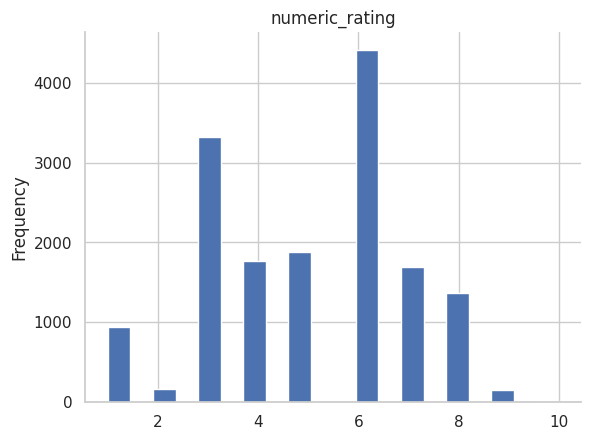

In [32]:
# @title numeric_rating

from matplotlib import pyplot as plt
reviews_df['numeric_rating'].plot(kind='hist', bins=20, title='numeric_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 5. Load & Process Aspect Data

In [33]:
# To verify the jsonl is in correct setup

path = os.path.join(DATASET_DIR, 'aspect_data', 'review_with_aspect.jsonl')
print(os.path.exists(path), path)
print("Full path:      ", path)

True /content/drive/MyDrive/1 METU/7/IS 584 – Deep Learning for Text Analytics/project/dataset/aspect_data/review_with_aspect.jsonl
Full path:       /content/drive/MyDrive/1 METU/7/IS 584 – Deep Learning for Text Analytics/project/dataset/aspect_data/review_with_aspect.jsonl


In [34]:
# Count total lines (total reviews with aspect annotations)
!wc -l "{path}"

25986 /content/drive/MyDrive/1 METU/7/IS 584 – Deep Learning for Text Analytics/project/dataset/aspect_data/review_with_aspect.jsonl


In [35]:
# The first entry
with open(path, 'r', encoding='utf-8') as f:
    first = json.loads(f.readline())
print("Keys in first entry:", first.keys())
print("Sample labels:", first['labels'][:2])

Keys in first entry: dict_keys(['id', 'text', 'labels'])
Sample labels: [[0, 1029, 'summary'], [1030, 1201, 'motivation_positive']]


Each line is a JSON dict with:
- **`id`**: paper identifier  
- **`text`**: the full review text  
- **`labels`**: a list of `[start_idx, end_idx, "aspect[_sentiment]"]` tuples  

In [36]:
## LOADER OR N NUMBER OF ENTRIES
def load_aspects(n=30000):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= n:
                break
            data.append(json.loads(line))
    return data

# test:
short_list = load_aspects(3)
for e in short_list:
    print(e['id'], "→", len(e['text']), "chars,", len(e['labels']), "labels")


ICLR_2020_1123 → 3508 chars, 7 labels
ICLR_2018_813 → 2632 chars, 3 labels
NIPS_2019_796 → 1881 chars, 12 labels


In [37]:
# WHAT ARE THE LABELS OF ONE ENTRY
sample = short_list[0]
for s, e, tag in sample['labels']:
    snippet = sample['text'][s:e][:50].replace("\n"," ")
    print(f"  [{tag}] → “{snippet}…”")

  [summary] → “This work studies the predictive uncertainty issue…”
  [motivation_positive] → “The issue researched in this work is of significan…”
  [clarity_positive] → “The motivation , research issues and the proposed …”
  [soundness_negative] → “The current recommendation is Weak Reject because …”
  [substance_negative] → “this experimental study does not seem to conduct s…”
  [meaningful_comparison_negative] → “Is this comparison fair ?…”
  [soundness_negative] → “The novelty and significance of fine-tuning the pr…”


In [38]:
# SAMPLEEXTRACTION LOOP
rows = []

for entry in tqdm(short_list, desc='Prot aspects'):
    pid, txt = entry['id'], entry['text']
    # Each label is [start_idx, end_idx, "aspect[_sentiment]"]
    for lbl in entry['labels']:
        if len(lbl) < 3:
            continue
        s, e, tag = lbl
        seg = txt[s:e]
        parts = tag.split('_')
        rows.append({
            'paper_id':   pid,
            'aspect':     parts[0],
            'sentiment':  parts[1] if len(parts)>1 else None,
            'length':     len(seg.split())
        })

import pandas as pd
df = pd.DataFrame(rows)
print("Prototype df shape:", df.shape)
print(df.head())


Prot aspects: 100%|██████████| 3/3 [00:00<00:00, 13315.25it/s]

Prototype df shape: (22, 4)
         paper_id      aspect sentiment  length
0  ICLR_2020_1123     summary      None     167
1  ICLR_2020_1123  motivation  positive      26
2  ICLR_2020_1123     clarity  positive      14
3  ICLR_2020_1123   soundness  negative      17
4  ICLR_2020_1123   substance  negative      14


In [39]:
stats = (df.groupby('aspect')
           .agg(count=('aspect','size'),
                pos=('sentiment', lambda x: (x=='positive').sum()),
                neg=('sentiment', lambda x: (x=='negative').sum()),
                neu=('sentiment', lambda x: x.isna().sum()),
                avg_len=('length','mean'))
           .reset_index())
print(stats)

        aspect  count  pos  neg  neu     avg_len
0      clarity      5    2    3    0   16.400000
1   meaningful      1    0    0    0    5.000000
2   motivation      2    2    0    0   15.500000
3  originality      1    0    1    0   10.000000
4    soundness      7    3    4    0   19.000000
5    substance      3    0    3    0   11.000000
6      summary      3    0    0    3  136.666667


Now that `df` holds one row per aspect span (with columns `paper_id`, `aspect`, `sentiment`, `length`), we can:

1. **Compute summary statistics** per aspect type (`count`, `pos`, `neg`, `neu`, `avg_len`).  
2. **Prepare** a long-form `sent_df` for plotting sentiment counts.  
3. **Plot** a 2×2 grid of:
   - (0,0) Aspect span counts  
   - (0,1) Sentiment breakdown by aspect  
   - (1,0) Histogram of span lengths  
   - (1,1) Left blank for symmetry

        aspect  count  pos  neg  neu     avg_len
0      clarity      5    2    3    0   16.400000
1   meaningful      1    0    0    0    5.000000
2   motivation      2    2    0    0   15.500000
3  originality      1    0    1    0   10.000000
4    soundness      7    3    4    0   19.000000
5    substance      3    0    3    0   11.000000
6      summary      3    0    0    3  136.666667


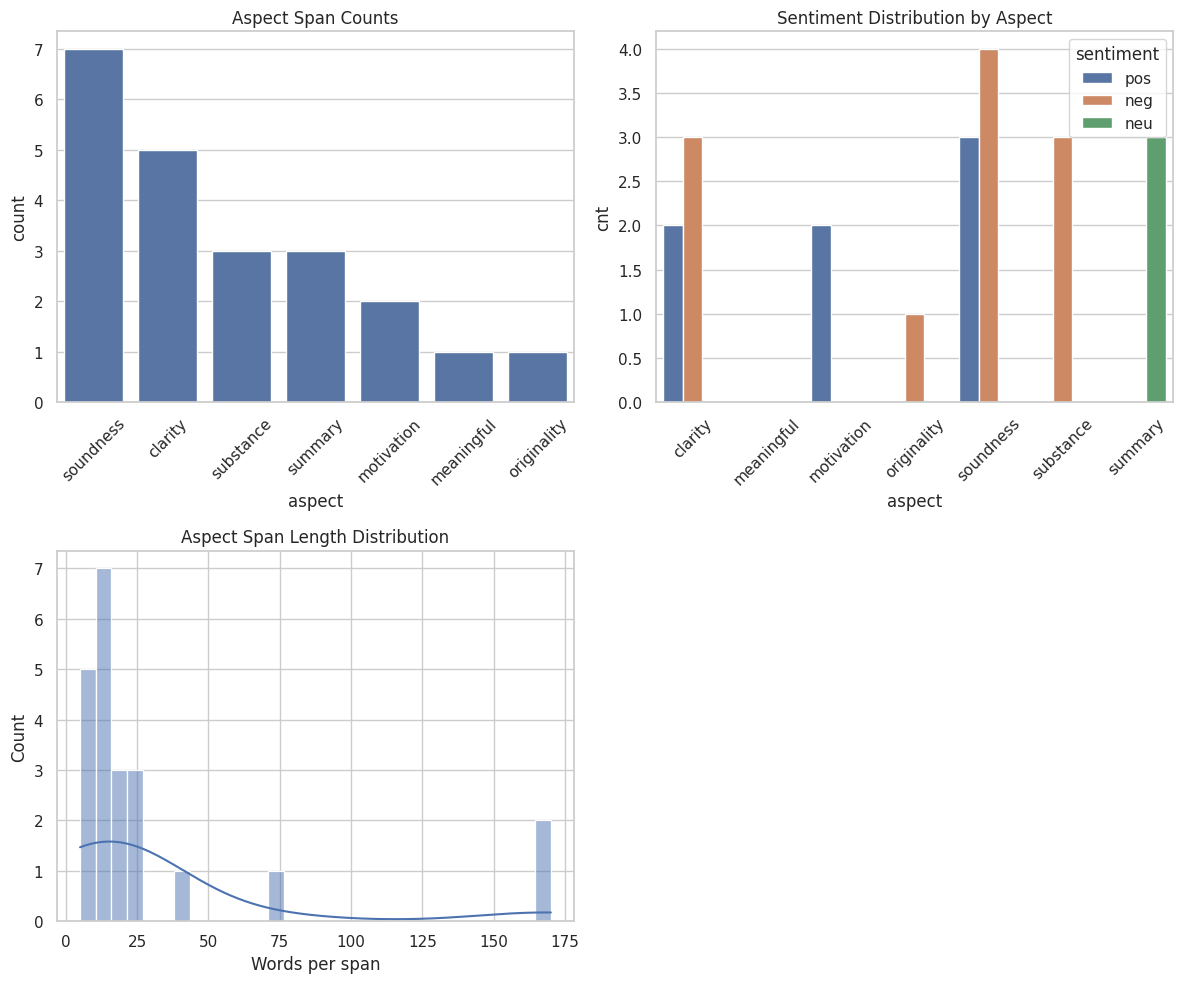

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Compute per-aspect statistics
stats = (
    df
    .groupby('aspect')
    .agg(
        count     = ('aspect', 'size'),
        pos       = ('sentiment', lambda x: (x=='positive').sum()),
        neg       = ('sentiment', lambda x: (x=='negative').sum()),
        neu       = ('sentiment', lambda x: x.isna().sum()),
        avg_len   = ('length', 'mean')
    )
    .reset_index()
)
print(stats)

# 6.2 Prepare sentiment DataFrame for stacked bar
sent_df = stats.melt(
    id_vars='aspect',
    value_vars=['pos','neg','neu'],
    var_name='sentiment',
    value_name='cnt'
)

# 6.3 Create 2×2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Plot 6.1: Aspect span counts
sns.barplot(
    data=stats.sort_values('count', ascending=False),
    x='aspect', y='count', ax=axs[0]
)
axs[0].set_title("Aspect Span Counts")
axs[0].tick_params(axis='x', rotation=45)

# Plot 6.2: Sentiment distribution by aspect
sns.barplot(
    data=sent_df,
    x='aspect', y='cnt', hue='sentiment',
    ax=axs[1]
)
axs[1].set_title("Sentiment Distribution by Aspect")
axs[1].tick_params(axis='x', rotation=45)

# Plot 6.3: Aspect span length histogram
sns.histplot(
    df['length'], bins=30, kde=True,
    ax=axs[2]
)
axs[2].set_title("Aspect Span Length Distribution")
axs[2].set_xlabel("Words per span")

# Leave the last subplot empty for additional plots later
axs[3].axis('off')

plt.tight_layout()
plt.show()


In [41]:
def process_aspects(lst):
    """
    From a list of aspect‐annotated review dicts, produce:
      - aspect_df: one row per labeled span
      - aspect_stats: counts, sentiment breakdown, avg length per aspect
    """
    recs = []  # collect each aspect span as a record

    # Loop through each loaded review entry
    for entry in tqdm(lst, desc='Processing aspects'):
        pid = entry['id']         # paper identifier
        txt = entry['text']       # full review text

        # Each label is [start_idx, end_idx, "aspect[_sentiment]"]
        for lbl in entry.get('labels', []):
            if len(lbl) < 3:
                continue  # skip malformed labels
            start, end, tag = lbl
            seg = txt[start:end]      # extract the span text
            parts = tag.split('_')    # split into aspect and optional sentiment

            recs.append({
                'paper_id': pid,
                'aspect':    parts[0],                     # e.g. "clarity"
                'sentiment': parts[1] if len(parts) > 1 else None,
                'length':    len(seg.split())             # word count of span
            })

    # Build a DataFrame of all spans
    aspect_df = pd.DataFrame(recs)

    # Aggregate stats per aspect type
    aspect_stats = (
        aspect_df
        .groupby('aspect')
        .agg(
            count     = ('aspect', 'size'),
            pos       = ('sentiment', lambda x: (x == 'positive').sum()),
            neg       = ('sentiment', lambda x: (x == 'negative').sum()),
            neu       = ('sentiment', lambda x: x.isna().sum()),
            avg_len   = ('length', 'mean')
        )
        .reset_index()
    )

    return aspect_df, aspect_stats


#
aspect_list   = load_aspects(5000)                   # load 5K entries
aspect_df, aspect_stats = process_aspects(aspect_list)
print(f"Processed {len(aspect_df)} aspect spans across {aspect_stats.shape[0]} aspect types")
aspect_stats.head()

Processing aspects: 100%|██████████| 5000/5000 [00:00<00:00, 83769.14it/s]

Processed 28168 aspect spans across 8 aspect types


,aspect,count,pos,neg,neu,avg_len
0,clarity,5400,2441,2959,0,13.673519
1,meaningful,2035,0,0,0,16.906143
2,motivation,2780,2098,682,0,14.687050
3,originality,3942,2228,1714,0,14.461695
4,replicability,911,49,862,0,13.912184


### 7. Check Table Sizes & Preview Samples

Now that we have our three main tables—`papers_df`, `reviews_df`, and `aspect_df`—let’s:

1. **Verify their dimensions** to ensure we loaded the expected number of rows and columns.  
2. **Peek at the first few rows** of each to see the column names and data.

In [42]:
# Papers vs. Reviews
print("Papers shape:        ", papers_df.shape)   # (rows=number of papers, cols=metadata fields)
print("Reviews shape:       ", reviews_df.shape)  # (rows=individual reviews, cols=review features)
print("Aspect spans shape:  ", aspect_df.shape)   # (rows=each aspect span, cols=span features)

# First few papers
papers_df.head()

Papers shape:         (8877, 8)
Reviews shape:        (34046, 7)
Aspect spans shape:   (28168, 4)


,id,conference,decision,url,hasContent,hasReview,title,authors
0,ICLR_2017_395,ICLR,Reject,http://openreview.net/pdf/c1cfee5be26dee2679a1...,true,true,RL^2: Fast Reinforcement Learning via Slow Rei...,"[Yan Duan, John Schulman, Xi Chen, Peter L. Ba..."
1,ICLR_2017_281,ICLR,Reject,http://openreview.net/pdf/2f13fb612ef82e430be7...,true,true,A Joint Many-Task Model: Growing a Neural Netw...,"[Kazuma Hashimoto, Caiming Xiong, Yoshimasa Ts..."
2,ICLR_2017_142,ICLR,Accept (Poster),http://openreview.net/pdf/1b6c5951af988d823360...,true,true,Automatic Rule Extraction from Long Short Term...,"[W. James Murdoch, Arthur Szlam]"
3,ICLR_2017_31,ICLR,Accept (Poster),http://openreview.net/pdf/8463d5bb4a13ac71ddfd...,true,true,Transfer of View-manifold Learning to Similari...,"[Xingyu Lin, Hao Wang, Zhihao Li, Yimeng Zhang..."
4,ICLR_2017_175,ICLR,Accept (Poster),http://openreview.net/pdf/908e82ec04bafe607a8b...,true,true,Learning Invariant Representations Of Planar C...,"[Gautam Pai, Aaron Wetzler, Ron Kimmel]"


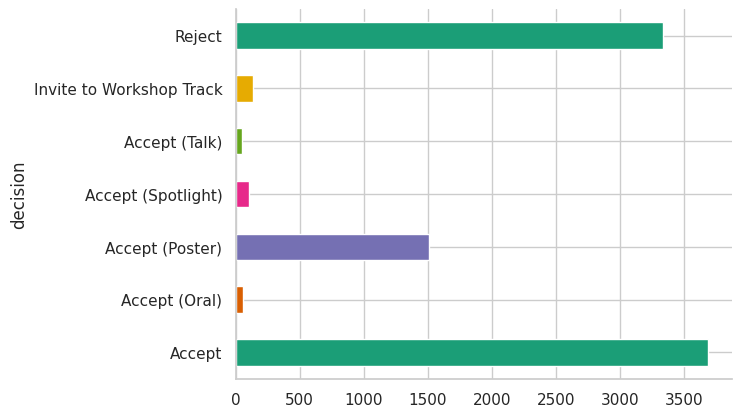

In [43]:
# @title decision

from matplotlib import pyplot as plt
import seaborn as sns
papers_df.groupby('decision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
# Preview the first 3 papers
print("\nFirst few papers:")
display(papers_df.head(3))

# Preview the first 3 reviews
print("\nFirst few reviews:")
display(reviews_df.head(3))

# Preview the first 3 aspect spans
print("\nFirst few aspect spans:")
display(aspect_df.head(3))


First few papers:


,id,conference,decision,url,hasContent,hasReview,title,authors
0,ICLR_2017_395,ICLR,Reject,http://openreview.net/pdf/c1cfee5be26dee2679a1...,true,true,RL^2: Fast Reinforcement Learning via Slow Rei...,"[Yan Duan, John Schulman, Xi Chen, Peter L. Ba..."
1,ICLR_2017_281,ICLR,Reject,http://openreview.net/pdf/2f13fb612ef82e430be7...,true,true,A Joint Many-Task Model: Growing a Neural Netw...,"[Kazuma Hashimoto, Caiming Xiong, Yoshimasa Ts..."
2,ICLR_2017_142,ICLR,Accept (Poster),http://openreview.net/pdf/1b6c5951af988d823360...,true,true,Automatic Rule Extraction from Long Short Term...,"[W. James Murdoch, Arthur Szlam]"



First few reviews:


,paper_id,review_type,review_idx,review_text,numeric_rating,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,7.0,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5.0,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4.0,4.0,138



First few aspect spans:


,paper_id,aspect,sentiment,length
0,ICLR_2020_1123,summary,None,167
1,ICLR_2020_1123,motivation,positive,26
2,ICLR_2020_1123,clarity,positive,14


### 7. High-Level EDA: Decisions, Review Length, Ratings & Aspect Counts

In this section we create a 2×2 grid of summary plots:

1. **Accept vs. Reject**: Bar chart of simplified paper decisions  
2. **Review Length**: Distribution of review word counts  
3. **Reviewer Ratings**: Bar chart of numeric ratings for “regular” reviews  
4. **Aspect Counts**: Bar chart of how many spans each aspect receives  

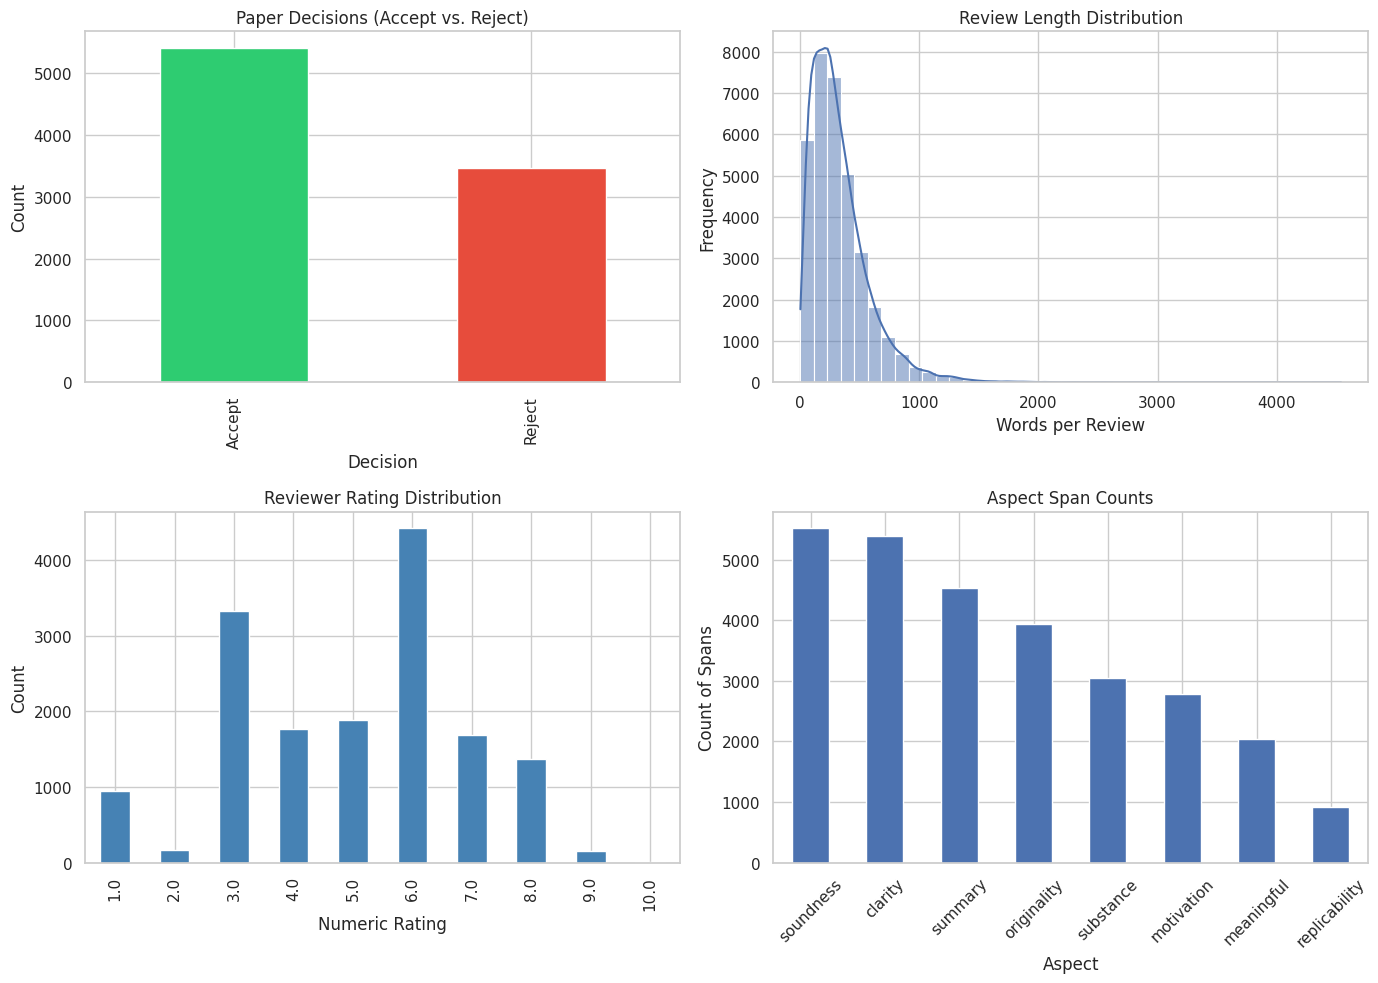

In [45]:
#Improved with ChatGPT to show all symmetrical and names in a beeter way
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# --- Prepare subsets with correct column names ---
papers_df['simple_decision'] = (
    papers_df['decision']
    .str.contains('Accept')
    .map({True: 'Accept', False: 'Reject'})
)

# Use 'review_type' instead of 'type'
reg = reviews_df[reviews_df['review_type'] == 'regular']

# --- Create 2×2 grid ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# 1) Paper Decisions
papers_df['simple_decision'] \
    .value_counts() \
    .plot.bar(color=['#2ecc71','#e74c3c'], ax=axs[0])
axs[0].set_title('Paper Decisions (Accept vs. Reject)')
axs[0].set_xlabel('Decision')
axs[0].set_ylabel('Count')

# 2) Review Length Distribution
sns.histplot(
    reviews_df['review_length'],  # corrected column name
    bins=40, kde=True, ax=axs[1]
)
axs[1].set_title('Review Length Distribution')
axs[1].set_xlabel('Words per Review')
axs[1].set_ylabel('Frequency')

# 3) Reviewer Rating Distribution
# Use 'numeric_rating' rather than 'rating'
reg['numeric_rating'] \
    .value_counts() \
    .sort_index() \
    .plot.bar(color='steelblue', ax=axs[2])
axs[2].set_title('Reviewer Rating Distribution')
axs[2].set_xlabel('Numeric Rating')
axs[2].set_ylabel('Count')

# 4) Aspect Span Counts
aspect_stats.sort_values('count', ascending=False) \
    .plot.bar(x='aspect', y='count', legend=False, ax=axs[3])
axs[3].set_title('Aspect Span Counts')
axs[3].tick_params(axis='x', rotation=45)
axs[3].set_xlabel('Aspect')
axs[3].set_ylabel('Count of Spans')

plt.tight_layout()
plt.show()


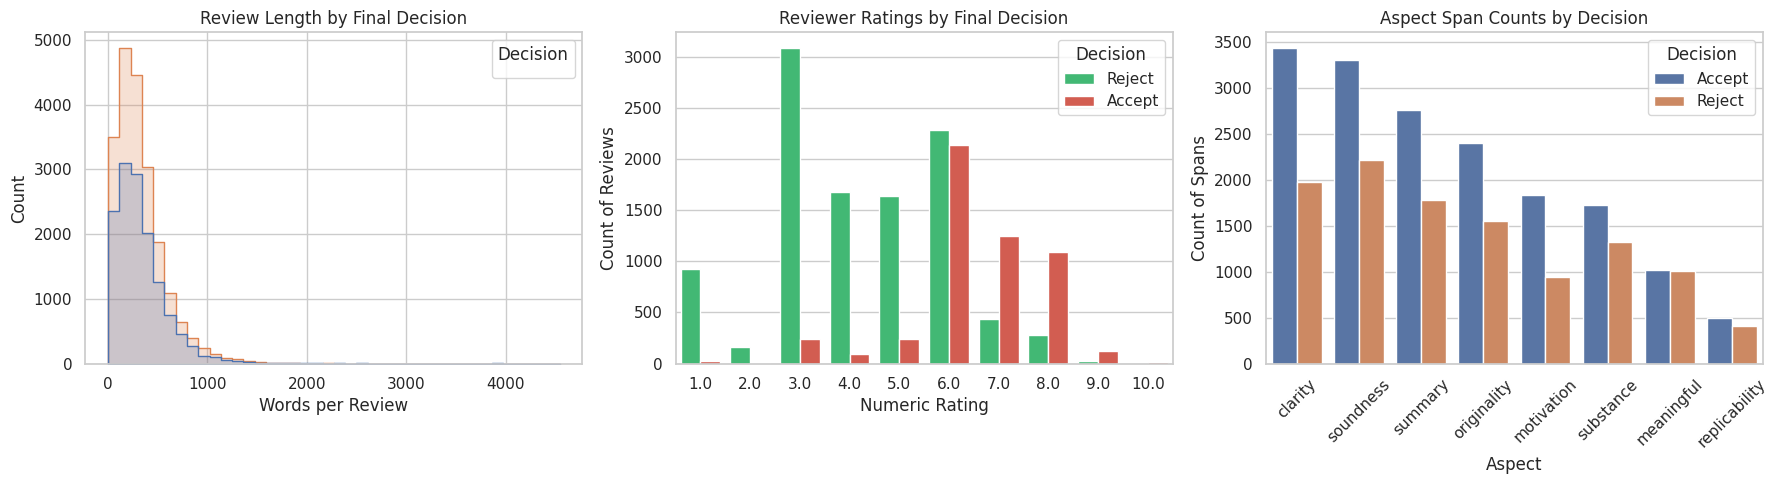

In [46]:
sns.set(style='whitegrid')

# As the lead on this project, I want to ensure every review and paper row is tagged
# with its final Accept/Reject outcome. First, we add 'simple_decision' to papers_df if missing.
if 'simple_decision' not in papers_df.columns:
    papers_df['simple_decision'] = (
        papers_df['decision']
        .str.contains('Accept')
        .map({True: 'Accept', False: 'Reject'})
    )

# Next, propagate that same decision label into reviews_df via the paper_id key.
reviews_df['simple_decision'] = reviews_df['paper_id'] \
    .map(papers_df.set_index('id')['simple_decision'])

# Now we build a side-by-side comparison: review length, rating, and aspect counts by decision.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# —— Plot A: How long are reviews for accepted vs. rejected papers?
sns.histplot(
    data=reviews_df,
    x='review_length',
    hue='simple_decision',
    bins=40,
    element='step',
    stat='count',
    common_norm=False,
    ax=axes[0]
)
axes[0].set_title("Review Length by Final Decision")
axes[0].set_xlabel("Words per Review")
axes[0].set_ylabel("Count")
# Seaborn drew the legend automatically; reposition it for clarity
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, title="Decision", loc='upper right')

# —— Plot B: Distribution of numeric ratings, split by decision
sns.countplot(
    data=reviews_df[reviews_df['review_type'] == 'regular'],
    x='numeric_rating',
    hue='simple_decision',
    palette=['#2ecc71', '#e74c3c'],
    ax=axes[1]
)
axes[1].set_title("Reviewer Ratings by Final Decision")
axes[1].set_xlabel("Numeric Rating")
axes[1].set_ylabel("Count of Reviews")
axes[1].legend(title="Decision")

# —— Plot C: How many aspect annotations appear in accepts vs. rejects?
#    We merge aspect_df with simple_decision, then count spans per aspect & decision.
aspect_counts = (
    aspect_df
    .merge(
        papers_df[['id', 'simple_decision']],
        left_on='paper_id',
        right_on='id',
        how='left'
    )
    .groupby(['aspect', 'simple_decision'])
    .size()
    .reset_index(name='count')
)

sns.barplot(
    data=aspect_counts.sort_values('count', ascending=False),
    x='aspect',
    y='count',
    hue='simple_decision',
    ax=axes[2]
)
axes[2].set_title("Aspect Span Counts by Decision")
axes[2].set_xlabel("Aspect")
axes[2].set_ylabel("Count of Spans")
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title="Decision")

plt.tight_layout()
plt.show()

It’s interesting to see that both accepted and rejected papers have similar review‐length ranges overall, but really long reviews (around 800–1500 words) show up more often when papers get accepted. This tells me that length by itself isn’t a perfect clue, but when a review is unusually detailed it’s a helpful hint. The rating scores give a clearer picture—most rejects fall in the 3–5 range and most accepts in the 6–8 range—but scores of 5 and 6 overlap in both groups. That overlap is exactly where pulling up past examples could help decide. With a RAG layer, we could grab similar 1,000‐word reviews and see how they turned out, or look at past 5–6 scores with the same mix of comments to learn which details mattered most. Finally, accepted papers usually get more aspect notes (like soundness or clarity) than rejects, but there’s still overlap. An agent that checks each aspect one by one—and even brings in past cases for rare aspects—could pick up on nuances a single‐step model would miss. Altogether, these observations make me confident that combining retrieval with a multi‐step reasoning process will give us stronger, more reliable predictions when things aren’t black and white.  



In [47]:
!pip install -qU transformers
!pip show transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 94.2 MB/s eta 0:00:00
Name: transformers
Version: 4.52.4
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers


In [48]:
print(df.columns)
print(reviews_df.columns)
print(papers_df.columns)
print(aspect_df.columns)

Index(['paper_id', 'aspect', 'sentiment', 'length'], dtype='object')
Index(['paper_id', 'review_type', 'review_idx', 'review_text',
       'numeric_rating', 'numeric_confidence', 'review_length',
       'simple_decision'],
      dtype='object')
Index(['id', 'conference', 'decision', 'url', 'hasContent', 'hasReview',
       'title', 'authors', 'simple_decision'],
      dtype='object')
Index(['paper_id', 'aspect', 'sentiment', 'length'], dtype='object')


In [49]:
# Code has warned and I used colabs help and added the 'label' column by mapping the 'simple_decision'
# Ensure 'simple_decision' exists and drop NaNs before mapping
if 'simple_decision' not in reviews_df.columns:
     print("Warning: 'simple_decision' column not found. Cannot create 'label'.")
     # Decide how to handle: exit, create dummy column, etc.
     # For now, we'll assume the previous cell adding 'simple_decision' ran successfully.
     pass # Or raise an error, depending on desired behavior

# Map 'simple_decision' to 0/1 for the 'label' column
# Drop rows where 'simple_decision' is NaN before mapping to avoid errors
reviews_df = reviews_df.dropna(subset=["simple_decision"]).reset_index(drop=True)
reviews_df["label"] = reviews_df["simple_decision"].map({"Reject": 0, "Accept": 1})

In [50]:
print(df.columns)
print(reviews_df.columns)
print(papers_df.columns)
print(aspect_df.columns)

Index(['paper_id', 'aspect', 'sentiment', 'length'], dtype='object')
Index(['paper_id', 'review_type', 'review_idx', 'review_text',
       'numeric_rating', 'numeric_confidence', 'review_length',
       'simple_decision', 'label'],
      dtype='object')
Index(['id', 'conference', 'decision', 'url', 'hasContent', 'hasReview',
       'title', 'authors', 'simple_decision'],
      dtype='object')
Index(['paper_id', 'aspect', 'sentiment', 'length'], dtype='object')


In [51]:
# 1. Count how many missing labels or texts you have
print("Missing labels:", reviews_df["label"].isna().sum())
print("Missing review_text:", reviews_df["review_text"].isna().sum())

# 2. See the rows with missing labels
missing_label_rows = reviews_df[reviews_df["label"].isna()]
display(missing_label_rows.head(10)[["review_text", "simple_decision"]])

# 3. Or get a full missing-value summary on every column
print(reviews_df.isna().sum())


Missing labels: 0
Missing review_text: 0


,review_text,simple_decision


paper_id                  0
review_type               0
review_idx                0
review_text               0
numeric_rating        18315
numeric_confidence    21853
review_length             0
simple_decision           0
label                     0
dtype: int64


In [52]:
reviews_df = reviews_df.dropna(subset=["simple_decision"]).reset_index(drop=True)

In [66]:
# 1. Count how many missing labels or texts you have
print("Missing labels:", reviews_df["label"].isna().sum())
print("Missing review_text:", reviews_df["review_text"].isna().sum())

# 2. See the rows with missing labels
missing_label_rows = reviews_df[reviews_df["label"].isna()]
display(missing_label_rows.head(10)[["review_text", "simple_decision"]])

# 3. Or get a full missing-value summary on every column
print(reviews_df.isna().sum())

Missing labels: 34043
Missing review_text: 0


,review_text,simple_decision
0,The paper is about channel sparsity in Convolu...,Reject
1,This paper aims to improve efficiency of convo...,Reject
2,The paper experiments with channel to channel ...,Reject
3,This paper investigates the impact of orthogon...,Reject
4,"The paper is well-motivated, and is part of a ...",Reject
5,Vanishing and exploding gradients makes the op...,Reject
6,This paper investigates the fact why deep netw...,Accept
7,The paper provides a highly complex algebraic ...,Accept
8,This paper addresses the question of which fun...,Accept
9,After rebuttal:\n\nThanks for reporting the Al...,Reject


paper_id                  0
review_type               0
review_idx                0
review_text               0
numeric_rating        18315
numeric_confidence    21853
review_length             0
simple_decision           0
label                 34043
dtype: int64


Train/Validation Split & Tokenization

Baseline BERT Training

In [68]:
# Debugged and rewritten wwith GPT
# 1) Install / upgrade dependencies
!pip install -U scikit-learn evaluate

In [56]:
# 2) Imports
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets     import Dataset
from sklearn.model_selection import train_test_split

In [69]:
# 3) Login to W&B
import wandb
# wandb.login(key="your_wandb_api_key_here")  # Add your W&B API key

wandb.init(
    project="ASAP_review",
    entity="tuna-ozturk1283",
    name="bert-finetune-run"
)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


eval/accuracy,▁▁▁▁
eval/f1,▁▁▁▁
eval/loss,▁█▁▁
eval/precision,▁▁▁▁
eval/recall,▁▁▁▁
eval/runtime,▁█▄▅
eval/samples_per_second,█▁▅▄
eval/steps_per_second,█▁▅▄
test/accuracy,▁
test/f1,▁
test/loss,▁


In [70]:
# 4) Compute-metrics callback
def compute_metrics(eval_pred):
    logits = eval_pred.predictions
    labels = eval_pred.label_ids
    preds  = np.argmax(logits, axis=-1)
    return {
        "accuracy":  accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, average="binary"),
        "recall":    recall_score(labels, preds, average="binary"),
        "f1":        f1_score(labels, preds, average="binary"),
    }


In [71]:
# 5) Prepare data
#    Drop any NaNs, map Accept/Reject → 1/0
reviews_df = reviews_df.dropna(subset=["simple_decision","review_text"]).reset_index(drop=True)
reviews_df["label"] = reviews_df["simple_decision"].map({"Reject": 0, "Accept": 1})

In [72]:
from sklearn.model_selection import train_test_split
from datasets import Dataset


# ─── STEP B:  90/10 stratified split ───
df_train, df_val = train_test_split(
    reviews_df[["review_text", "label"]],
    test_size=0.1,
    random_state=42,
    stratify=reviews_df["label"]
)

# ─── STEP C:  Reset indexes so HF Dataset.from_pandas() won't create __index_level_0__ ───
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)

# ─── STEP D:  Tokenizer function (unchanged) ───
def tokenize_batch(batch):
    return tokenizer(
        batch["review_text"],
        truncation=True,
        padding="max_length",
        max_length=512
    )

# ─── STEP E:  Build HuggingFace Datasets ───
train_dataset = (
    Dataset.from_pandas(df_train)
           .map(tokenize_batch, batched=True)
           .rename_column("label", "labels")
           .remove_columns(["review_text"])   # no more "__index_level_0__"
)

val_dataset = (
    Dataset.from_pandas(df_val)
           .map(tokenize_batch, batched=True)
           .rename_column("label", "labels")
           .remove_columns(["review_text"])   # no more "__index_level_0__"
)


Map:   0%|          | 0/30638 [00:00<?, ? examples/s]

Map:   0%|          | 0/3405 [00:00<?, ? examples/s]

In [73]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# ─── 8) Model & Trainer ───
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2      # make sure this matches your number of classes
)

training_args = TrainingArguments(
    output_dir="outputs",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    learning_rate=2e-5,         # ← LOWER LR than the default!
    eval_strategy="epoch",      # run evaluation at the end of every epoch
    logging_steps=50,
    report_to="wandb",
    run_name="baseline-bert",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# ─── 9) Train! ───
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.367300,0.388369,0.811454,0.904298,0.768631,0.830964
2,0.305900,0.388512,0.825257,0.846483,0.867511,0.856868
3,0.242100,0.464406,0.827313,0.865701,0.844618,0.855030


TrainOutput(global_step=5745, training_loss=0.33137715342150653, metrics={'train_runtime': 1922.286, 'train_samples_per_second': 47.815, 'train_steps_per_second': 2.989, 'total_flos': 2.418358954235904e+16, 'train_loss': 0.33137715342150653, 'epoch': 3.0})

In [60]:
'''# 6) Stratified 90/10 split
df_train, df_val = train_test_split(
    reviews_df[["review_text", "label"]],
    test_size=0.1,
    random_state=42,
    stratify=reviews_df["label"]
)

# 7) Tokenization
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_batch(batch):
    return tokenizer(
        batch["review_text"],
        truncation=True,
        padding="max_length",
        max_length=512
    )

train_dataset = (
    Dataset.from_pandas(df_train)
    .map(tokenize_batch, batched=True)
    .rename_column("label", "labels")
    .remove_columns(["review_text", "__index_level_0__"])
)

val_dataset = (
    Dataset.from_pandas(df_val)
    .map(tokenize_batch, batched=True)
    .rename_column("label", "labels")
    .remove_columns(["review_text", "__index_level_0__"])
)

# 8) Model & Trainer
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)

training_args = TrainingArguments(
    output_dir="outputs",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    eval_strategy="epoch",
    logging_steps=50,
    report_to="wandb",
    run_name="baseline-bert",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# 9) Train!
trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/30638 [00:00<?, ? examples/s]

Map:   0%|          | 0/3405 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.685000,0.671807,0.602937,0.602937,1.000000,0.752290
2,0.687200,0.675057,0.602937,0.602937,1.000000,0.752290
3,0.674000,0.671987,0.602937,0.602937,1.000000,0.752290


TrainOutput(global_step=5745, training_loss=0.6741151990633202, metrics={'train_runtime': 1919.4163, 'train_samples_per_second': 47.886, 'train_steps_per_second': 2.993, 'total_flos': 2.418358954235904e+16, 'train_loss': 0.6741151990633202, 'epoch': 3.0})

In [74]:
import os
from dotenv import load_dotenv
from huggingface_hub import login

# Load environment variables from .env file
load_dotenv()

# Log in to the Hugging Face Hub using token from .env file
hf_token = os.getenv('HF_TOKEN')
if hf_token:
    login(token=hf_token)
    print('Successfully logged in to Hugging Face Hub')
else:
    print('HF_TOKEN not found in environment variables')

In [77]:
# After trainer.train()
trainer.save_model("asap-bert-best")                # saves to output_dir
tokenizer.save_pretrained("outputs")

trainer.push_to_hub(commit_message="Add final BERT checkpoint")

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/tuna1283/outputs/commit/9212e45b41472382b69cbead13c7d1cadbd76108', commit_message='Add final BERT checkpoint', commit_description='', oid='9212e45b41472382b69cbead13c7d1cadbd76108', pr_url=None, repo_url=RepoUrl('https://huggingface.co/tuna1283/outputs', endpoint='https://huggingface.co', repo_type='model', repo_id='tuna1283/outputs'), pr_revision=None, pr_num=None)

In [ ]:
'''import os
from dotenv import load_dotenv
from huggingface_hub import login

# Load environment variables from .env file
load_dotenv()

# Log in to the Hugging Face Hub using token from .env file
hf_token = os.getenv('HF_TOKEN')
if hf_token:
    login(token=hf_token)
    print('Successfully logged in to Hugging Face Hub')
else:
    print('HF_TOKEN not found in environment variables')'''

In [ ]:
'''# the huggingface_hub library
!pip install -U huggingface_hub transformers

from transformers import AutoModelForSequenceClassification, AutoTokenizer

repo_id = "tuna1283/outputs"

# Load the model from the Hugging Face Hub
# You can specify a revision (branch, tag, or commit hash) if needed,
# e.g., revision="main" or revision="a1b2c3d"
loaded_model = AutoModelForSequenceClassification.from_pretrained(repo_id)

# Load the tokenizer
# This will download the tokenizer files from the Hugging Face Hub
loaded_tokenizer = AutoTokenizer.from_pretrained(repo_id)

print(f"Successfully loaded model and tokenizer from {repo_id}")
print("Loaded model:", loaded_model.__class__.__name__)
print("Loaded tokenizer:", loaded_tokenizer.__class__.__name__)

# You can now use loaded_tokenizer and loaded_model for inference or further training'''

In [80]:
# 1. Install transformers library if you haven't already in the new environment
!pip install -qU transformers

# 2. Import necessary classes
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 3. Define the repository ID where you pushed your model
repo_id = "tuna1283/outputs"

# 4. Load the fine-tuned model
# AutoModelForSequenceClassification will automatically load the model configuration
# and weights from the specified repository ID on the Hugging Face Hub.
print(f"Loading model from: {repo_id}")
loaded_model = AutoModelForSequenceClassification.from_pretrained(repo_id)
print("Model loaded successfully!")

# 5. Load the corresponding tokenizer
# AutoTokenizer will automatically load the tokenizer configuration
# and files from the same repository ID.
print(f"Loading tokenizer from: {repo_id}")
loaded_tokenizer = AutoTokenizer.from_pretrained(repo_id)
print("Tokenizer loaded successfully!")

# Now you have 'loaded_model' and 'loaded_tokenizer' which are ready to be used
# for inference (making predictions on new text) or further fine-tuning.

# Example: You can now use the loaded_model to make predictions
# from transformers import pipeline
# classifier = pipeline("text-classification", model=loaded_model, tokenizer=loaded_tokenizer)
# results = classifier("This review is amazing!")
# print(results)

Loading model from: tuna1283/outputs


config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Model loaded successfully!
Loading tokenizer from: tuna1283/outputs


tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Tokenizer loaded successfully!


In [81]:
# Now you have 'loaded_model' and 'loaded_tokenizer' which are ready to be used
# for inference (making predictions on new text) or further fine-tuning.

from transformers import pipeline
classifier = pipeline("text-classification", model=loaded_model, tokenizer=loaded_tokenizer)
results = classifier("This review is amazing!")
print(results)

Device set to use cuda:0


[{'label': 'LABEL_1', 'score': 0.9988055229187012}]


In [82]:
classifier = pipeline("text-classification", model=loaded_model, tokenizer=loaded_tokenizer)
results = classifier("This review is so bad!")
print(results)

Device set to use cuda:0


[{'label': 'LABEL_0', 'score': 0.9369971752166748}]


In [78]:
# Recalculating evaluation metrics on the validation set to confirm performance

# 1. Use the trainer (or model) to get predictions on the validation set
# Assuming we have a HuggingFace Trainer set up as `trainer` and a validation dataset `val_dataset`:
eval_results = trainer.evaluate()
print("Recomputed evaluation metrics:", eval_results)


# 2. Extract predictions and true labels for manual verification (if needed)
pred_outputs = trainer.predict(val_dataset)
y_pred = np.argmax(pred_outputs.predictions, axis=1)   # predicted class indices
y_true = pred_outputs.label_ids                        # true class indices

# Compute classification metrics manually to double-check
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall    = recall_score(y_true, y_pred, average='binary')
f1        = f1_score(y_true, y_pred, average='binary')

print(f"Manual check – Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
      f"Recall: {recall:.4f}, F1: {f1:.4f}")

# 3. (Optional) Compute Jaccard similarity for each sample and average it.
# In a single-label classification, this is equivalent to accuracy per sample (1 if correct, 0 if incorrect).
jaccard_scores = []
for true_label, pred_label in zip(y_true, y_pred):
    # Treat each label as a set with one element and compute Jaccard index with the predicted set
    if true_label == pred_label:
        jaccard_scores.append(1.0)   # perfect overlap if prediction is correct
    else:
        jaccard_scores.append(0.0)   # no overlap if prediction is wrong

mean_jaccard = np.mean(jaccard_scores)
print(f"Average Jaccard similarity (for single-label task, equals accuracy): {mean_jaccard:.4f}")


Recomputed evaluation metrics: {'eval_loss': 0.38851198554039, 'eval_accuracy': 0.8252569750367107, 'eval_precision': 0.8464828897338403, 'eval_recall': 0.867510959571359, 'eval_f1': 0.8568679336059658, 'eval_runtime': 25.0549, 'eval_samples_per_second': 135.901, 'eval_steps_per_second': 17.003, 'epoch': 3.0}
Manual check – Accuracy: 0.8253, Precision: 0.8465, Recall: 0.8675, F1: 0.8569
Average Jaccard similarity (for single-label task, equals accuracy): 0.8253


In [85]:
from transformers import AutoModelForSequenceClassification, Trainer

# 1) Reload a fresh BERT (no training yet)
base_model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)

# 2) Wrap in a Trainer with the same args and eval/data
base_trainer = Trainer(
    model=base_model,
    args=training_args,       # same TrainingArguments you’ll use for fine-tuning
    train_dataset=train_dataset,  # not used here, but needed by Trainer API
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# 3) Evaluate untrained BERT on your validation set
base_eval_results = base_trainer.evaluate()
print("Untrained BERT eval metrics:", base_eval_results)

# 4) (Optional) Manual sanity check via predict + sklearn
pred_out = base_trainer.predict(val_dataset)
y_pred_base = np.argmax(pred_out.predictions, axis=1)
y_true      = pred_out.label_ids

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Untrained manual check — "
      f"Acc: {accuracy_score(y_true,y_pred_base):.4f}, "
      f"Prec: {precision_score(y_true,y_pred_base,average='binary'):.4f}, "
      f"Rec: {recall_score(y_true,y_pred_base,average='binary'):.4f}, "
      f"F1:  {f1_score(y_true,y_pred_base,average='binary'):.4f}")

jaccard_base = (y_pred_base == y_true).mean()
print(f"Untrained model Jaccard (≈Accuracy): {jaccard_base:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Untrained BERT eval metrics: {'eval_loss': 0.831637978553772, 'eval_model_preparation_time': 0.0029, 'eval_accuracy': 0.39794419970631423, 'eval_precision': 0.6666666666666666, 'eval_recall': 0.0029225523623964927, 'eval_f1': 0.005819592628516004, 'eval_runtime': 24.5891, 'eval_samples_per_second': 138.476, 'eval_steps_per_second': 17.325}
Untrained manual check — Acc: 0.3979, Prec: 0.6667, Rec: 0.0029, F1:  0.0058
Untrained model Jaccard (≈Accuracy): 0.3979


In [86]:
import pandas as pd

base_row = {
    'Model':    'Untrained BERT',
    'Accuracy': base_eval_results['eval_accuracy'],
    'Precision':base_eval_results['eval_precision'],
    'Recall':   base_eval_results['eval_recall'],
    'F1':       base_eval_results['eval_f1'],
    'Jaccard':  jaccard_base
}

fine_row = {
    'Model':    'Fine-tuned BERT',
    'Accuracy': eval_results['eval_accuracy'],
    'Precision':eval_results['eval_precision'],
    'Recall':   eval_results['eval_recall'],
    'F1':       eval_results['eval_f1'],
    'Jaccard':  mean_jaccard
}

df_compare = pd.DataFrame([base_row, fine_row]).set_index('Model')
print(df_compare.round(4))


                 Accuracy  Precision  Recall      F1  Jaccard
Model                                                        
Untrained BERT     0.3979     0.6667  0.0029  0.0058   0.3979
Fine-tuned BERT    0.8253     0.8465  0.8675  0.8569   0.8253
